In [1]:
from pathlib import Path
import datetime as dt
import xarray as xr
import shapely
import geopandas as gp
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
matplotlib.rc_file_defaults()

We'll be using three fire perimeter datasets:

 * AK fires 1940-2020
 * AK current year 2021
 * YT fires 1946-2020

----

In [3]:
firepthAK_hist = Path("/Volumes/CWMobileSSD/Geodata_fires/AICC/ALFD_3338_current.gpkg") 
fireDFAK_hist_3338 = gp.read_file(firepthAK_hist, layer='ALFD_1940_2021_20211222_3338').to_crs(epsg=3338)
fireDFAK_hist_3338['FIREYEAR'] = fireDFAK_hist_3338['FIREYEAR'].astype(int)
fireDFAK_hist_3338 = fireDFAK_hist_3338[['NAME', 'ACRES', 'FIREYEAR', 'geometry']]

/Users/cwaigl/miniconda3/envs/python38_geo/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [4]:
print(sorted(fireDFAK_hist_3338.FIREYEAR.unique()))
print(f"{len(fireDFAK_hist_3338)} fires")

[1940, 1942, 1943, 1944, 1946, 1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
4452 fires


In [5]:
firepthAK_2021 = Path("/Volumes/CWMobileSSD/Geodata_fires/AICC/AK2021/2021Perim20211228.gpkg") 
fireDFAK_2021_3338 = gp.read_file(firepthAK_2021, layer='2021Perim20211228').to_crs(epsg=3338)
fireDFAK_2021_3338['FIREYEAR'] = fireDFAK_2021_3338['FIREYEAR'].astype(int)
fireDFAK_2021_3338 = fireDFAK_2021_3338[['NAME', 'ACRES', 'FIREYEAR', 'geometry']]

In [6]:
print(sorted(fireDFAK_2021_3338.FIREYEAR.unique()))
print(f"{len(fireDFAK_2021_3338)} fires")
fireDFAK_2021_3338

[2021]
138 fires


,NAME,ACRES,FIREYEAR,geometry
0,Marley,2.2,2021,"MULTIPOLYGON (((264891.390 1300229.395, 264893..."
1,Loveall,0.4,2021,"MULTIPOLYGON (((145088.651 1142222.078, 145085..."
2,Clam Gulch,0.1,2021,"MULTIPOLYGON (((143032.073 1139852.283, 143031..."
3,Clam Gulch Middle,0.0,2021,"MULTIPOLYGON (((144462.337 1141384.386, 144460..."
4,Sesame,0.1,2021,"MULTIPOLYGON (((145023.803 1142115.976, 145021..."
...,...,...,...,...
133,Doll,287.1,2021,"MULTIPOLYGON (((151230.777 1804918.067, 151185..."
134,Kanuti River,418.7,2021,"MULTIPOLYGON (((159837.747 1839967.325, 159767..."
135,Cultas Creek,40450.0,2021,"MULTIPOLYGON (((521829.031 1733783.555, 521845..."
136,Preacher Creek,17.7,2021,"MULTIPOLYGON (((378986.851 1778072.330, 378986..."


In [7]:
firepth_YT = Path("/Volumes/CWMobileSSD/Geodata_fires/YukonTerritory/YT_FireHistory_current/Fire_History.shp") 
fireDF_YT = gp.read_file(firepth_YT)
fireDF_YT['ACRES'] = fireDF_YT.AREA_HA * 2.47105 
fireDF_YT = fireDF_YT[fireDF_YT.FIRE_YEAR < 2022]
fireDF_YT = fireDF_YT[['FIRE_ID', 'ACRES', 'FIRE_YEAR', 'geometry']]
fireDF_YT_3338 = fireDF_YT.to_crs(epsg=3338)
fireDF_YT_3338.columns = ['NAME', 'ACRES', 'FIREYEAR', 'geometry']

In [8]:
print(sorted(fireDF_YT_3338.FIREYEAR.unique()))
print(f"{len(fireDF_YT_3338)} fires")
fireDF_YT_3338

[1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
1734 fires


,NAME,ACRES,FIREYEAR,geometry
0,195500060,28141.036871,1955,"POLYGON ((868446.649 1666276.136, 867820.098 1..."
1,195500049,2220.650942,1955,"POLYGON ((869573.296 1637004.496, 869050.481 1..."
2,195500012,6018.006512,1955,"POLYGON ((869684.075 1617181.651, 869306.979 1..."
3,195500034,50122.788653,1955,"POLYGON ((885132.889 1617598.489, 884881.503 1..."
4,195200009,904.876592,1952,"POLYGON ((693932.300 1641318.128, 693751.802 1..."
...,...,...,...,...
1823,2012MA017,491.332067,2012,"POLYGON ((896653.219 1872447.157, 896767.605 1..."
1824,2012MA013,10968.403853,2012,"POLYGON ((861809.492 1844086.855, 861840.163 1..."
1825,2012MA014,1756.285740,2012,"POLYGON ((873066.571 1843789.294, 873083.953 1..."
1826,2012MA015,3843.235605,2012,"POLYGON ((841825.247 1675246.606, 841838.984 1..."


`totalfires_3338` is the merged dataframe for all three datasets, in Alaska Albers (equal area projection)

In [9]:
totalfires_3338 = gp.GeoDataFrame(
    pd.concat([fireDFAK_hist_3338, fireDFAK_2021_3338, fireDF_YT_3338] , ignore_index=True),
    crs="EPSG:3338")

In [10]:
totalfires_3338

,NAME,ACRES,FIREYEAR,geometry
0,Veh-Tenjerlow,1.300000,2008,"MULTIPOLYGON (((352413.412 1904584.588, 352409..."
1,Tiinkdhul Lake,345.400000,2008,"MULTIPOLYGON (((479573.392 1883508.253, 479573..."
2,Kiliovilik,606.500000,2007,"MULTIPOLYGON (((-140004.388 1847209.325, -1401..."
3,McKinley River,77.900000,2007,"MULTIPOLYGON (((132532.288 1517468.512, 132511..."
4,Kateel River,343.400000,2007,"MULTIPOLYGON (((-206380.674 1730074.245, -2063..."
...,...,...,...,...
6319,2012MA017,491.332067,2012,"POLYGON ((896653.219 1872447.157, 896767.605 1..."
6320,2012MA013,10968.403853,2012,"POLYGON ((861809.492 1844086.855, 861840.163 1..."
6321,2012MA014,1756.285740,2012,"POLYGON ((873066.571 1843789.294, 873083.953 1..."
6322,2012MA015,3843.235605,2012,"POLYGON ((841825.247 1675246.606, 841838.984 1..."


Now let's find bounds for the ERA5 grid representation from the historical AK fire data. We don't take YT into account as we only use it to extend AK fires for completion - we're really interested in Alaska. 

In [12]:
fireDF_4326 = fireDFAK_hist_3338.to_crs(epsg=4326)
fireDF_4326.total_bounds

array([-178.84145569,   51.54694434, -132.59941666,   70.15916168])

In [6]:
# minlon, minlat, maxlon, maxlat = -179.0, 51.5, -132.5, 70.25
minlon, minlat, maxlon, maxlat = -170.0, -90, 180.25, 90.25
dlon = dlat = 0.25
lons = np.arange(minlon, maxlon+dlon, dlon)
lats = np.arange(minlat, maxlat+dlat, dlat)

In [8]:
lats.shape, lons.shape

((722,), (1402,))

In [15]:
polygs = []
for lat in lats:
    for lon in lons:
        polygs.append(
            (lon, lat, shapely.geometry.box(lon-dlon/2, lat-dlat/2, lon+dlon/2, lat+dlat/2))
        )

`gridcells` is the dataset of ERA5 grid cells, centered on each quarter degree lat/lon, with a quarter degree side length. We have it in WGS84 and Alaska Albers. 

In [16]:
gridcells_4326 = gp.GeoDataFrame(
    pd.DataFrame.from_records(polygs, columns=['lon', 'lat', 'cellbox']),
    geometry='cellbox', crs="EPSG:4326")
gridcells_3338 = gridcells_4326.to_crs(epsg=3338)

In [17]:
gridcells_3338['cellacres'] = gridcells_3338.geometry.area / 4046.86
gridcells_3338

,lon,lat,cellbox,cellacres
0,-179.00,51.50,"POLYGON ((-1702076.455 474367.728, -1691958.86...",119317.622596
1,-178.75,51.50,"POLYGON ((-1685765.694 467991.064, -1675745.05...",119317.622592
2,-178.50,51.50,"POLYGON ((-1669431.045 461675.846, -1659507.50...",119317.622587
3,-178.25,51.50,"POLYGON ((-1653072.738 455422.163, -1643246.43...",119317.622582
4,-178.00,51.50,"POLYGON ((-1636691.006 449230.104, -1626962.08...",119317.622575
...,...,...,...,...
14207,-133.50,70.25,"POLYGON ((784008.077 2361269.024, 775638.875 2...",65007.201466
14208,-133.25,70.25,"POLYGON ((793198.116 2364237.672, 784730.812 2...",65007.201466
14209,-133.00,70.25,"POLYGON ((802376.915 2367240.893, 793811.629 2...",65007.201466
14210,-132.75,70.25,"POLYGON ((811544.344 2370278.647, 802881.196 2...",65007.201466


For this section we work in Alaska Albers: We first find all intersections of grid cells with fires. Then we spatially aggregate all intersection polygons by gridcell (lat/lon) and year. We concatenate the names of the fires that affect a grid cell in a given year and provide the area of the merged fire polygons in acres (1 acre = 4046.86 sq m). 

In [18]:
intersect = gp.overlay(totalfires_3338, gridcells_3338,  how="intersection")
intersect = intersect.dissolve(
    by=['FIREYEAR', 'lat', 'lon'], 
    aggfunc='; '.join,
    as_index=False)
intersect['yearfireacres'] = intersect.geometry.area / 4046.86

In [19]:
intersect

,FIREYEAR,lat,lon,geometry,NAME,yearfireacres
0,1940,62.25,-160.75,"POLYGON ((-349768.813 1395810.279, -349648.585...",Stuyahok River,12736.737928
1,1940,62.50,-160.75,"POLYGON ((-351220.298 1396166.102, -350901.223...",Stuyahok River,128.620821
2,1942,61.50,-149.50,"POLYGON ((244282.845 1302010.707, 244152.414 1...",Anderson,12.052159
3,1942,61.50,-149.25,"POLYGON ((245938.182 1302451.865, 245778.738 1...",Anderson,152.541265
4,1942,61.75,-149.25,"POLYGON ((244491.506 1302563.281, 244495.218 1...",Anderson,2210.714893
...,...,...,...,...,...,...
10846,2021,68.00,-159.25,"MULTIPOLYGON (((-215072.423 2022602.788, -2150...",Noatak River,926.217920
10847,2021,68.00,-159.00,"POLYGON ((-209548.646 2026148.188, -209685.184...",Noatak River,10756.779823
10848,2021,68.25,-159.25,"MULTIPOLYGON (((-214759.560 2026648.888, -2147...",Anisak River; Noatak River,516.260337
10849,2021,68.25,-159.00,"POLYGON ((-214305.913 2032477.148, -214308.880...",Noatak River,6803.445137


The previous intersection has for geometry the polygons of fire within each fire-affected grid cell in a given year. But we want a dataset whose geometry are the grid cells themselves, and more importantly, we need the area of the grid cells (which is not a constant!) to caluclate the percentage burned. 

The resulting dataframe has _two_ geometry columns, which we can switch back and forth between. Both are in AK Albers. We rename the fire polygons in grid cells "fireshard" and switch the geometry back to the cell boxes. 

In [20]:
cells_with_intersect = intersect.merge(gridcells_3338, on=['lat', 'lon'])
cells_with_intersect['percentburned'] = cells_with_intersect.yearfireacres / cells_with_intersect.cellacres * 100
cells_with_intersect.rename_geometry('fireshard', inplace=True)
cells_with_intersect.set_geometry('cellbox', inplace=True) 

In [21]:
cells_with_intersect

,FIREYEAR,lat,lon,fireshard,NAME,yearfireacres,cellbox,cellacres,percentburned
0,1940,62.25,-160.75,"POLYGON ((-349768.813 1395810.279, -349648.585...",Stuyahok River,12736.737928,"POLYGON ((-343999.112 1367123.991, -341215.227...",89449.583199,14.239013
1,1957,62.25,-160.75,"POLYGON ((-346217.752 1395448.102, -346349.765...",BONASILA,4644.243401,"POLYGON ((-343999.112 1367123.991, -341215.227...",89449.583199,5.192024
2,1997,62.25,-160.75,"POLYGON ((-354228.210 1394493.519, -354183.851...",Hawk River,1844.540461,"POLYGON ((-343999.112 1367123.991, -341215.227...",89449.583199,2.062101
3,2015,62.25,-160.75,"MULTIPOLYGON (((-346303.475 1379672.513, -3463...",Hawk River; Stuyahok River,40962.549981,"POLYGON ((-343999.112 1367123.991, -341215.227...",89449.583199,45.794009
4,1940,62.50,-160.75,"POLYGON ((-351220.298 1396166.102, -350901.223...",Stuyahok River,128.620821,"POLYGON ((-341215.227 1394937.889, -338431.706...",88711.181156,0.144988
...,...,...,...,...,...,...,...,...,...
10846,2021,61.00,-161.50,"POLYGON ((-400619.336 1234252.882, -400589.304...",Kiktak Island,254.215030,"POLYGON ((-398283.086 1232291.815, -395184.282...",93114.304400,0.273014
10847,2021,61.75,-165.75,"POLYGON ((-615036.186 1366100.517, -615124.430...",Kongishluk Bay,3033.282208,"POLYGON ((-611278.061 1347675.312, -606409.027...",90920.971787,3.336174
10848,2021,67.00,-162.75,"POLYGON ((-381413.416 1930038.760, -381384.559...",Little Noatak Slough,16.362798,"POLYGON ((-378723.177 1904340.115, -375129.308...",75128.502585,0.021780
10849,2021,67.25,-162.25,"MULTIPOLYGON (((-361779.747 1930180.588, -3618...",Mulik Hills; Hugo Creek,73.812299,"POLYGON ((-353494.658 1929113.679, -350110.505...",74358.647359,0.099265


Save to file.

In [25]:
cells_with_intersect.drop(columns=['fireshard']).to_file("firecells_ERA5.gpkg", driver='GPKG') 

We can now do some plotting... 

In [30]:
sns.set_context('notebook', font_scale=1)

Text(0.5, 1.0, '2019')

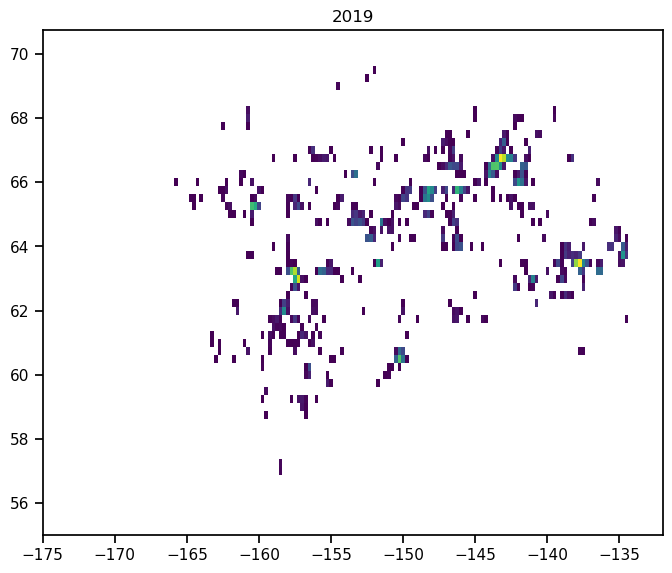

In [48]:
yr = 2019
fig, ax = plt.subplots(figsize=(8, 8),)
ax.set_xlim((-175, maxlon+0.5))
ax.set_ylim((55, maxlat+0.5))
ax.set_aspect('equal')
cells_with_intersect[cells_with_intersect.FIREYEAR == yr].to_crs(epsg=4326).plot(
        column='percentburned',
        ax=ax,
#        legend=True,
#        legend_kwds={'label': f"percentage burned in {yr}",
#        'orientation': "horizontal"}
    )
ax.set_title(f"{yr}")

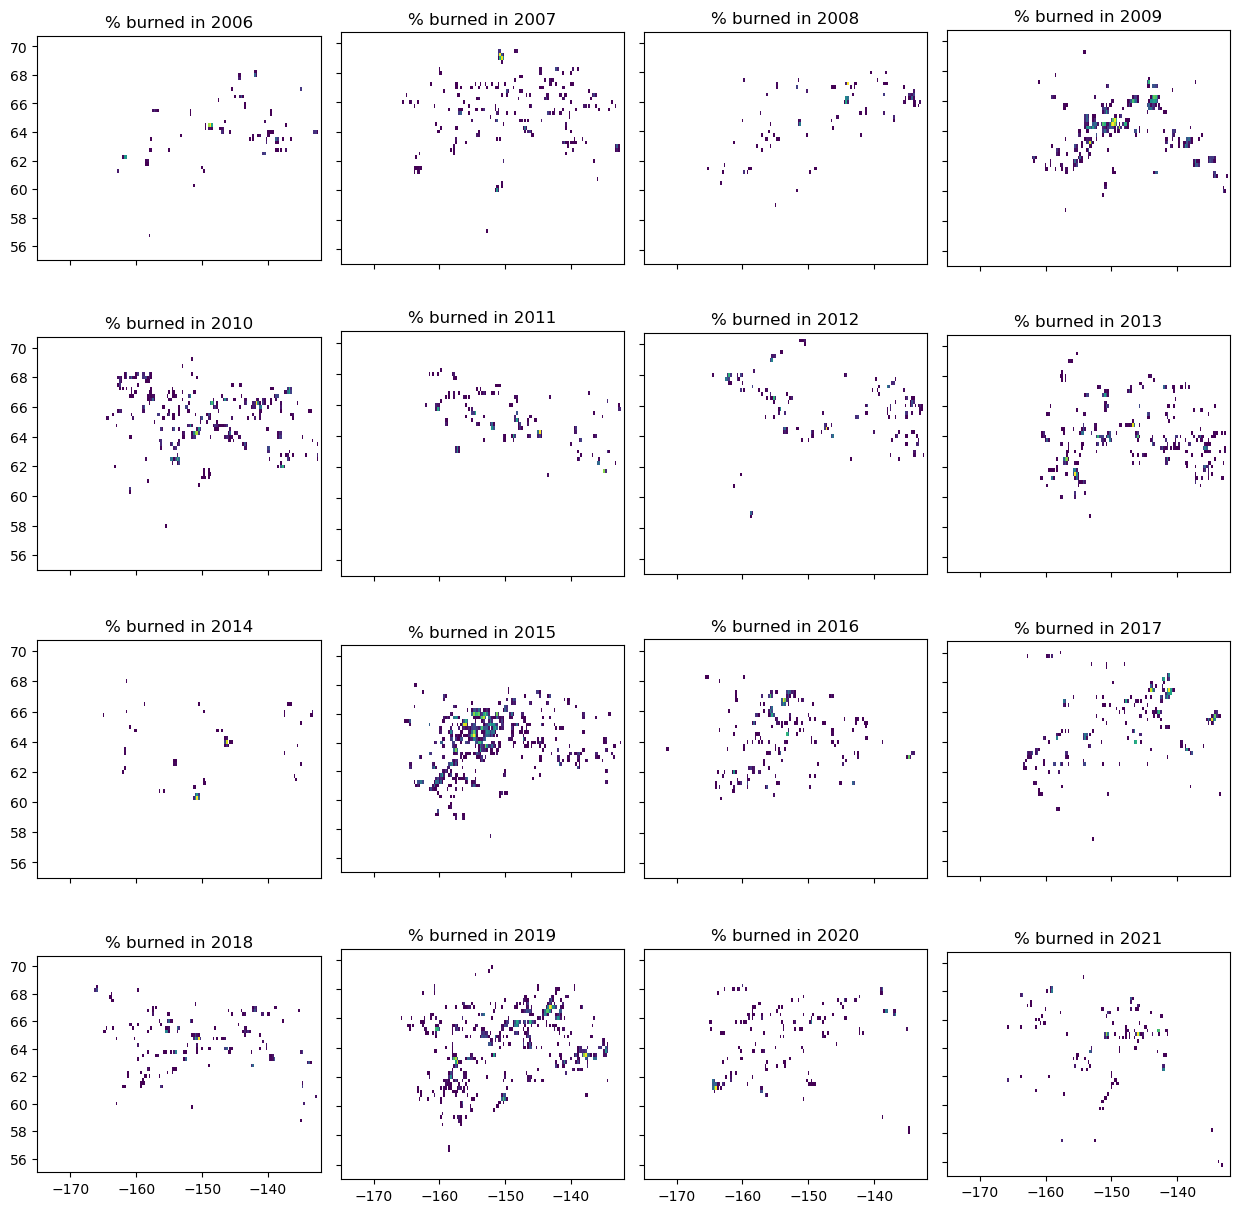

In [28]:
years = list(range(2006, 2022))
years_str = [str(yr) for yr in years]
fig, axs = plt.subplots(4, 4, 
                        figsize=(12.5, 12.5), 
                        sharex=True, sharey=True, 
#                        constrained_layout=True
                       )
axs[0][0].set_xlim((-175, maxlon+0.5))
axs[0][0].set_ylim((55, maxlat+0.5))
axs[0][0].set_aspect('equal')
for ax, yr in zip(axs.flatten(), years): 
    cells_with_intersect[cells_with_intersect.FIREYEAR == yr].to_crs(epsg=4326).plot(
        column='percentburned',
        ax=ax,
#        legend=True,
#        legend_kwds={'label': f"percentage burned in {yr}",
#        'orientation': "horizontal"}
    )
    ax.set_title(f"% burned in {yr}")
fig.tight_layout()


<AxesSubplot:xlabel='percentburned', ylabel='Probability'>

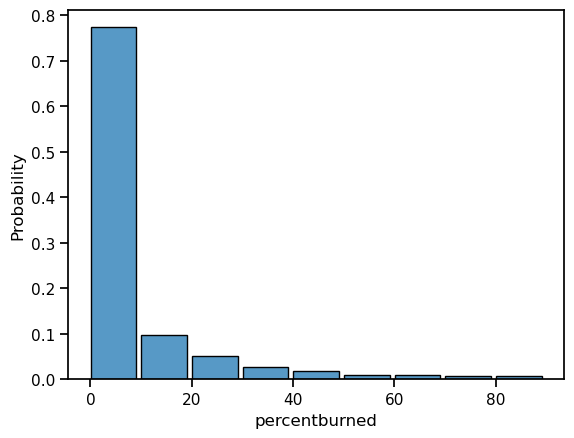

In [51]:
sns.histplot(cells_with_intersect[cells_with_intersect.FIREYEAR == 2019], x='percentburned', stat="probability", binwidth=10, shrink=.9)

In [63]:
cells_perc_allyears = cells_with_intersect[['FIREYEAR', 'lat', 'lon', 'cellbox', 'fireshard']].set_geometry(
    'fireshard').dissolve(
    by=['lat', 'lon'], as_index=False).set_geometry(
    'cellbox')

In [64]:
cells_perc_allyears['percentburned'] = cells_perc_allyears.fireshard.area / cells_perc_allyears.cellbox.area * 100
cells_perc_allyears

,lat,lon,fireshard,FIREYEAR,cellbox,percentburned
0,51.50,-178.75,"POLYGON ((-1690217.465 492478.424, -1690280.25...",2001,"POLYGON ((-1685765.694 467991.064, -1675745.05...",0.670630
1,54.25,-165.75,"POLYGON ((-767519.872 526025.495, -767519.975 ...",2018,"POLYGON ((-757090.903 523204.210, -752249.739 ...",0.016027
2,55.75,-133.25,"MULTIPOLYGON (((1277503.667 834023.465, 127750...",2021,"POLYGON ((1292466.072 828542.144, 1283852.224 ...",0.000285
3,55.75,-132.50,"POLYGON ((1320691.554 844892.040, 1320702.343 ...",1998,"POLYGON ((1337279.094 843391.553, 1328366.581 ...",0.107560
4,56.00,-158.75,"POLYGON ((-301850.458 678034.358, -301870.456 ...",1992,"POLYGON ((-288951.208 661648.378, -287011.893 ...",0.211352
...,...,...,...,...,...,...
3018,70.00,-150.50,"POLYGON ((133608.623 2242023.499, 133558.565 2...",2012,"POLYGON ((141462.240 2214976.333, 139966.098 2...",0.034606
3019,70.25,-151.25,"POLYGON ((110984.210 2241953.641, 110950.929 2...",2012,"POLYGON ((111028.051 2240941.571, 109842.838 2...",0.180769
3020,70.25,-151.00,"POLYGON ((111335.933 2241934.860, 111232.640 2...",2012,"POLYGON ((120675.822 2241377.688, 119387.621 2...",0.151951
3021,70.25,-150.75,"POLYGON ((129494.557 2242519.449, 129405.656 2...",2012,"POLYGON ((130321.884 2241850.121, 128930.712 2...",1.095165


Text(0.5, 1.0, 'Percent of ERA5 gridcells burned in all fires since 1940')

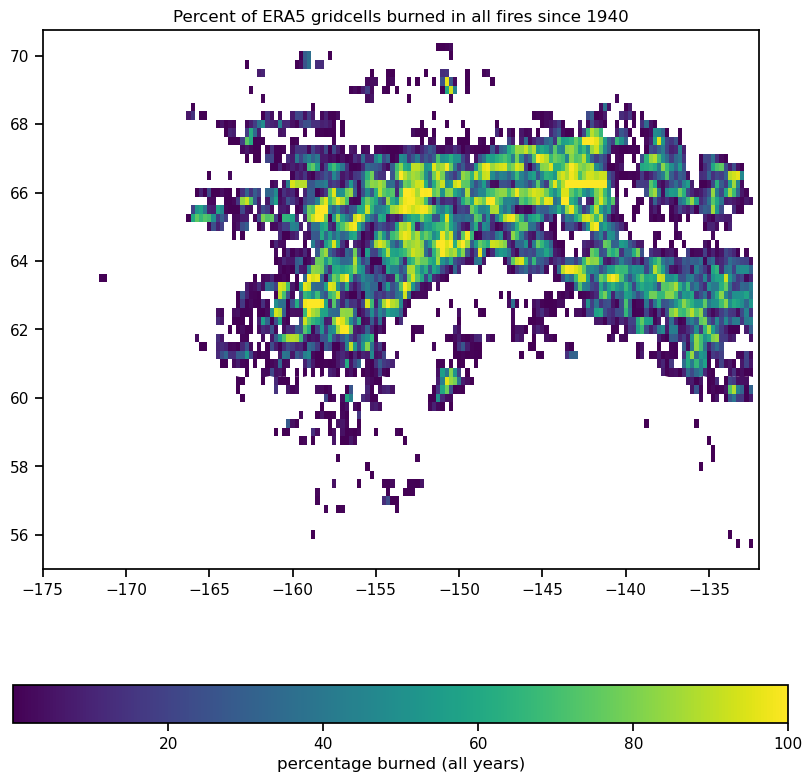

In [55]:
fig, ax = plt.subplots(figsize = (10, 10))
cells_perc_allyears.to_crs(epsg=4326).plot(
    column='percentburned', 
    legend=True,
    ax=ax,
    legend_kwds={'label': "percentage burned (all years)",
    'orientation': "horizontal"}
)
plt.xlim((-175, maxlon+0.5))
plt.ylim((55, maxlat+0.5))
plt.title('Percent of ERA5 gridcells burned in all fires since 1940') 


<AxesSubplot:xlabel='percentburned', ylabel='Probability'>

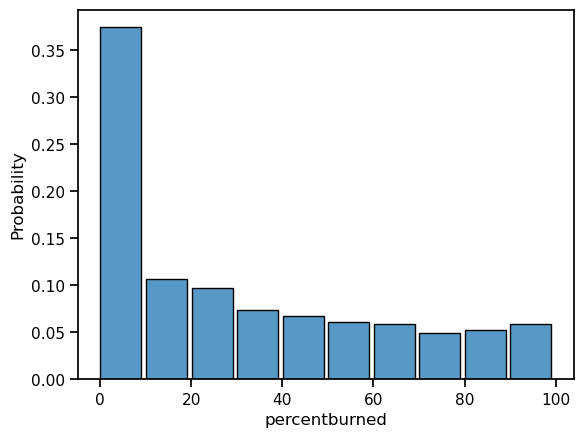

In [56]:
sns.histplot(cells_perc_allyears, x='percentburned', binwidth=10, stat="probability", shrink=.9)

In [66]:
numcols = len(lons)
numrows = len(lats)
print(numrows, numcols)

76 187


In [70]:
lonscoord = np.array(lons) % 360
latscoord = np.array(lats)
print(lonscoord, latscoord)

[181.   181.25 181.5  181.75 182.   182.25 182.5  182.75 183.   183.25
 183.5  183.75 184.   184.25 184.5  184.75 185.   185.25 185.5  185.75
 186.   186.25 186.5  186.75 187.   187.25 187.5  187.75 188.   188.25
 188.5  188.75 189.   189.25 189.5  189.75 190.   190.25 190.5  190.75
 191.   191.25 191.5  191.75 192.   192.25 192.5  192.75 193.   193.25
 193.5  193.75 194.   194.25 194.5  194.75 195.   195.25 195.5  195.75
 196.   196.25 196.5  196.75 197.   197.25 197.5  197.75 198.   198.25
 198.5  198.75 199.   199.25 199.5  199.75 200.   200.25 200.5  200.75
 201.   201.25 201.5  201.75 202.   202.25 202.5  202.75 203.   203.25
 203.5  203.75 204.   204.25 204.5  204.75 205.   205.25 205.5  205.75
 206.   206.25 206.5  206.75 207.   207.25 207.5  207.75 208.   208.25
 208.5  208.75 209.   209.25 209.5  209.75 210.   210.25 210.5  210.75
 211.   211.25 211.5  211.75 212.   212.25 212.5  212.75 213.   213.25
 213.5  213.75 214.   214.25 214.5  214.75 215.   215.25 215.5  215.75
 216. 

In [75]:
yrs = sorted(totalfires_3338.FIREYEAR.unique())
yrs

[1940,
 1942,
 1943,
 1944,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [77]:
pd.date_range(start=dt.datetime(yrs[0], 1, 1), end=dt.datetime(yrs[-1],1,1), freq='A')

DatetimeIndex(['1940-12-31', '1941-12-31', '1942-12-31', '1943-12-31',
               '1944-12-31', '1945-12-31', '1946-12-31', '1947-12-31',
               '1948-12-31', '1949-12-31', '1950-12-31', '1951-12-31',
               '1952-12-31', '1953-12-31', '1954-12-31', '1955-12-31',
               '1956-12-31', '1957-12-31', '1958-12-31', '1959-12-31',
               '1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
      

In [ ]:
n

In [97]:
gridded_fire_forraster = cells_with_intersect[['FIREYEAR', 'lat', 'lon', 'percentburned']].copy()
gridded_fire_forraster['year'] = pd.to_datetime(gridded_fire_forraster.FIREYEAR, format='%Y')
gridded_fire_forraster.drop(columns=['FIREYEAR'], inplace=True)
gridded_fire_forraster.rename (columns={'lat': 'grid_latitude', 'lon': 'grid_longitude'}, inplace=True)
gridded_fire_forraster.grid_longitude = gridded_fire_forraster.grid_longitude % 360
gridded_fire_forraster.set_index(['year', 'grid_latitude', 'grid_longitude'], inplace=True)
gridded_fireDS = gridded_fire_forraster.to_xarray()
gridded_fireDS

<xarray.Dataset>
Dimensions:         (year: 78, grid_latitude: 59, grid_longitude: 139)
Coordinates:
  * year            (year) datetime64[ns] 1940-01-01 1942-01-01 ... 2021-01-01
  * grid_latitude   (grid_latitude) float64 51.5 54.25 55.75 ... 70.0 70.25
  * grid_longitude  (grid_longitude) float64 181.2 188.5 188.8 ... 227.2 227.5
Data variables:
    percentburned   (year, grid_latitude, grid_longitude) float64 nan ... nan

In [109]:
gridded_fireDS.percentburned

<xarray.DataArray 'percentburned' (year: 78, grid_latitude: 59, grid_longitude: 139)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * year            (year) datetime64[ns] 1940-01-01 1942-01-01 ... 2021-01-01
  * grid_latitude   (grid_latitude) float64 51.5 54.25 55.75 ... 70.0 70.25
  * grid_longitude  (grid_longitude) float64 181.2 188.5 188.8 ... 227.2 227.5

In [110]:
template_lats = latscoord
template_lons = lonscoord
template_yrs = pd.date_range(start=dt.datetime(yrs[0], 1, 1), end=dt.datetime(2021,1,1), freq='AS')
template_data = np.zeros((numcols, numrows, len(template_yrs)))
templateDS = xr.DataArray(template_data, coords=[template_lons, template_lats, template_yrs], dims=["grid_longitude", "grid_latitude", "year"])

In [111]:
templateDS

<xarray.DataArray (grid_longitude: 187, grid_latitude: 76, year: 82)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * grid_longitude  (grid_longitude) float64 181.0 181.2 181.5 ... 227.2 227.5
  * grid_latitude   (grid_latitude) float64 51.5 51.75 52.0 ... 69.75 70.0 70.25
  * year            (year) datetime64[ns] 1940-01-01 1941-01-01 ... 2021-01-01

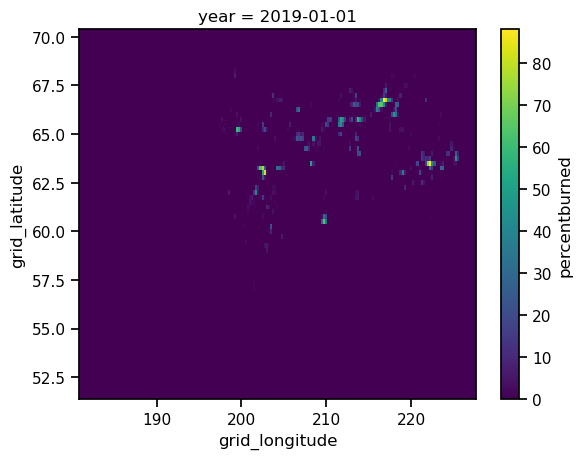

In [130]:
full_griddedfire = gridded_fireDS.combine_first(templateDS)
full_griddedfire.sel(year='2019').percentburned.plot()

In [138]:
qcarr = np.ones(len(full_griddedfire.year)).astype('int') 
qcarr[:6] = 0
qcarr[-1] = 0
qcarr

full_griddedfire['qc_year_complete'] = (['year'], qcarr)
full_griddedfire

<xarray.Dataset>
Dimensions:           (year: 82, grid_latitude: 76, grid_longitude: 187)
Coordinates:
  * year              (year) datetime64[ns] 1940-01-01 1941-01-01 ... 2021-01-01
  * grid_latitude     (grid_latitude) float64 51.5 51.75 52.0 ... 70.0 70.25
  * grid_longitude    (grid_longitude) float64 181.0 181.2 181.5 ... 227.2 227.5
Data variables:
    percentburned     (year, grid_latitude, grid_longitude) float64 0.0 ... 0.0
    qc_year_complete  (year) int64 0 0 0 0 0 0 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 0

In [147]:
full_griddedfire.attrs['title'] = "Yearly gridded fire extent"
full_griddedfire.attrs['institution'] = "International Arctic Research Center, UAF"
full_griddedfire.attrs['source'] = "Python, v. 0.1"
full_griddedfire.attrs['author'] = "Christine Waigl, cwaigl@alaska.edu"
full_griddedfire.attrs['history'] = str(dt.datetime.utcnow())
full_griddedfire.attrs['acknowledgements'] = "AICC, GeoYukon"

full_griddedfire.grid_latitude.attrs['units'] = "degrees_north"
full_griddedfire.grid_latitude.attrs['standard_name'] = "latitude"
full_griddedfire.grid_latitude.attrs['long_name'] = "latitude"
full_griddedfire.grid_longitude.attrs['units'] = "degrees_east"
full_griddedfire.grid_longitude.attrs['standard_name'] = "longitude"
full_griddedfire.grid_longitude.attrs['long_name'] = "longitude"
full_griddedfire.percentburned.attrs['units'] = "percent"
full_griddedfire.percentburned.attrs['long_name'] = "percentage of grid cell burned in given year"
full_griddedfire.percentburned.attrs['units'] = "percent"
full_griddedfire.qc_year_complete.attrs['long_name'] = "boolean qc flag: data for year complete"


In [148]:
full_griddedfire

<xarray.Dataset>
Dimensions:           (year: 82, grid_latitude: 76, grid_longitude: 187)
Coordinates:
  * year              (year) datetime64[ns] 1940-01-01 1941-01-01 ... 2021-01-01
  * grid_latitude     (grid_latitude) float64 51.5 51.75 52.0 ... 70.0 70.25
  * grid_longitude    (grid_longitude) float64 181.0 181.2 181.5 ... 227.2 227.5
Data variables:
    percentburned     (year, grid_latitude, grid_longitude) float64 0.0 ... 0.0
    qc_year_complete  (year) int64 0 0 0 0 0 0 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 0
Attributes:
    title:             Yearly gridded fire extent
    institution:       International Arctic Research Center, UAF
    source:            Python, v. 0.1
    author:            Christine Waigl, cwaigl@alaska.edu
    history:           2022-01-03 11:28:53.321616
    acknowledgements:  AICC, GeoYukon

In [149]:
full_griddedfire.to_netcdf('fireperimeter_gridded_quarter_degree.nc') 

---

<AxesSubplot:>

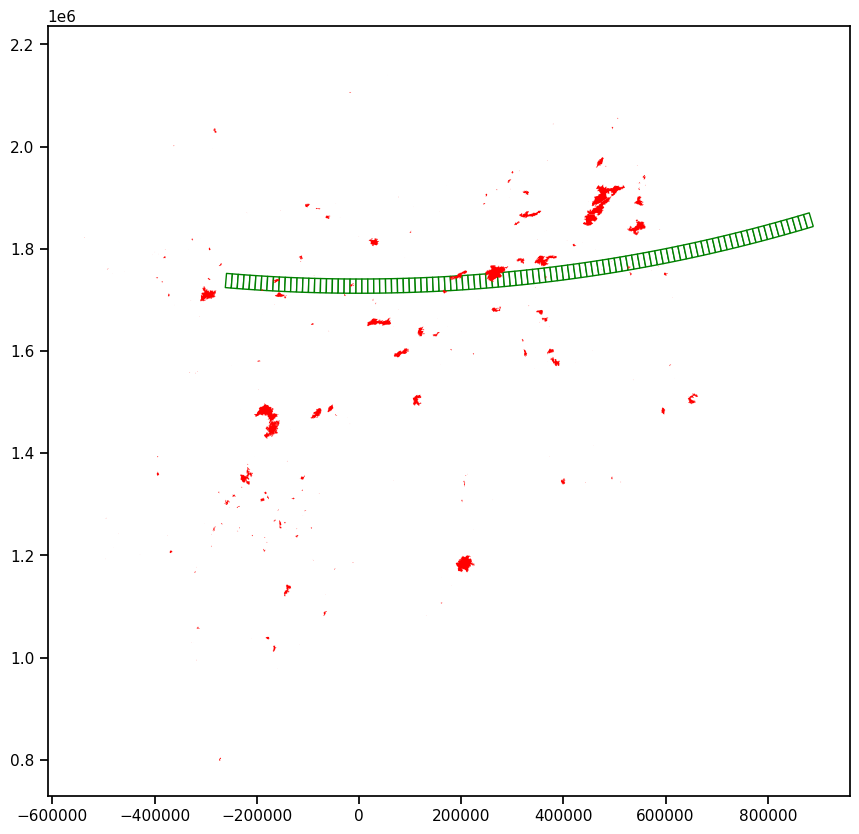

In [62]:
ax = gridcells_3338.iloc[10550:10650].plot(figsize=(15, 10), fc='w', ec='g')
fireDFAK_hist_3338[fireDFAK_hist_3338.FIREYEAR==2019].plot(color='r', ax=ax)